Mathematical transformer is used to make the data set normally distributed

### import libraries

In [1]:
import pandas as pd
import numpy as np

#for QQ plot
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

### load dataset

In [2]:
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# taking only required columns
df = df.loc[:, ["Survived", "Age", "Fare"]]
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
#check missing values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
#append missing values of age column with mean value
df["Age"].fillna(df["Age"].mean(), inplace=True)

### splitting data into train and test set

In [6]:
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.shape, X_test.shape

((712, 2), (179, 2))

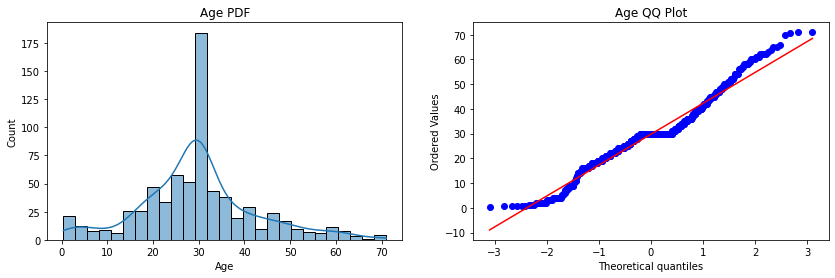

In [8]:
# QQ plot
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

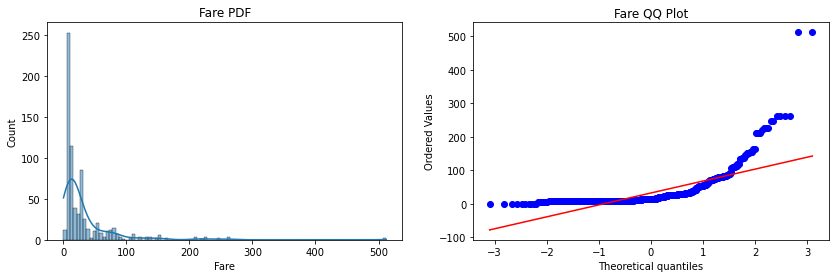

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

### without function transformation

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
clf = DecisionTreeClassifier()

In [11]:
lr.fit(X_train, y_train)
clf.fit(X_train, y_train)
    
y_pred = lr.predict(X_test)
y_pred1 = clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

print("Accuracy LR: ",accuracy_score(y_test, y_pred))
print("Accuracy DT: ",accuracy_score(y_test, y_pred1))

Accuracy LR:  0.6145251396648045
Accuracy DT:  0.5977653631284916


### using function transformer (log transformer)

In [13]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

trf =  FunctionTransformer(func=np.log1p)

In [14]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [15]:
lr = LogisticRegression()
clf = DecisionTreeClassifier()

lr.fit(X_train_transformed,y_train)
clf.fit(X_train_transformed,y_train)
    
y_pred = lr.predict(X_test_transformed)
y_pred1 = clf.predict(X_test_transformed)
    
print("Accuracy LR: ",accuracy_score(y_test,y_pred))
print("Accuracy DT: ",accuracy_score(y_test,y_pred1))

Accuracy LR:  0.6480446927374302
Accuracy DT:  0.6089385474860335


In [16]:
# check by using cross validation
from sklearn.model_selection import cross_val_score

X_transformed = trf.fit_transform(X)

lr = LogisticRegression()
clf = DecisionTreeClassifier()

print("LR: ",np.mean(cross_val_score(lr, X_transformed, y, scoring='accuracy', cv=10)))
print("DT: ",np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))

LR:  0.678027465667915
DT:  0.6543570536828963


### plot after transformation

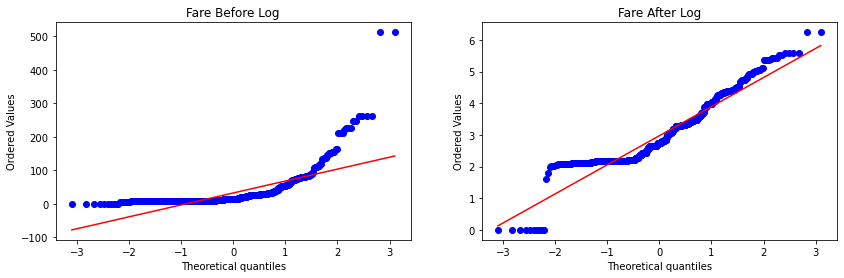

In [17]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

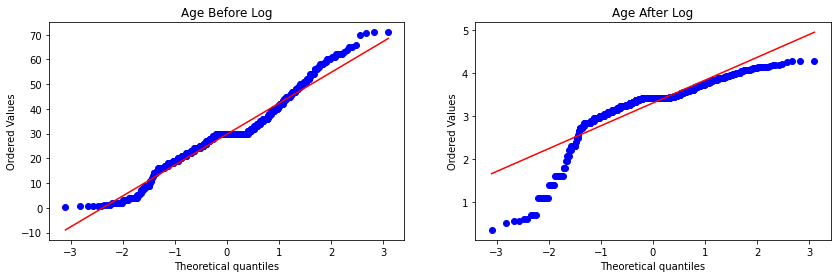

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

here the age column before transformation is more normally distributed then after distribution

In [19]:
# appluing transformation on only fare column
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [20]:
lr = LogisticRegression()
clf = DecisionTreeClassifier()

lr.fit(X_train_transformed2,y_train)
clf.fit(X_train_transformed2,y_train)
    
y_pred = lr.predict(X_test_transformed2)
y_pred2 = clf.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6368715083798883
Accuracy DT 0.6089385474860335


In [21]:
X_transformed2 = trf2.fit_transform(X)

lr = LogisticRegression()
clf = DecisionTreeClassifier()

print("LR: ",np.mean(cross_val_score(lr, X_transformed2, y, scoring='accuracy', cv=10)))
print("DT: ",np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv=10)))

LR:  0.6712609238451936
DT:  0.6588389513108615


### Other function transformer

In [22]:
def apply_transform(transform):
    X = df.loc[:,["Age", "Fare"]]
    y = df["Survived"]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    lr = LogisticRegression()
    
    print("Accuracy: ", np.mean(cross_val_score(lr, X_trans, y, scoring='accuracy', cv=10)))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy:  0.61729088639201


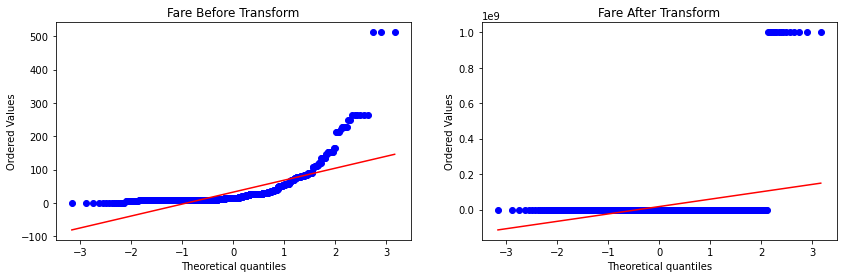

In [23]:
# reciprocal transformation
apply_transform(lambda x : 1/(x+0.000000001))

Accuracy:  0.6442446941323345


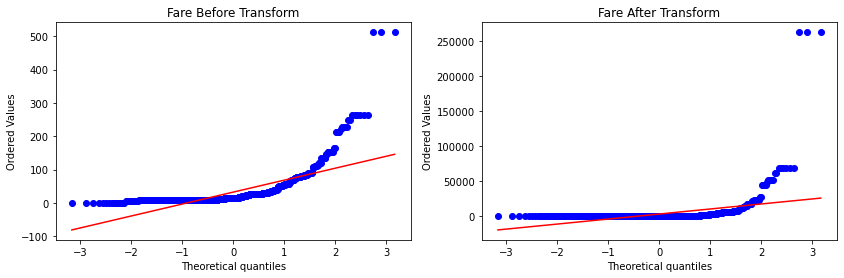

In [24]:
# square transformation
apply_transform(lambda x : x**2)

Accuracy:  0.6611485642946316


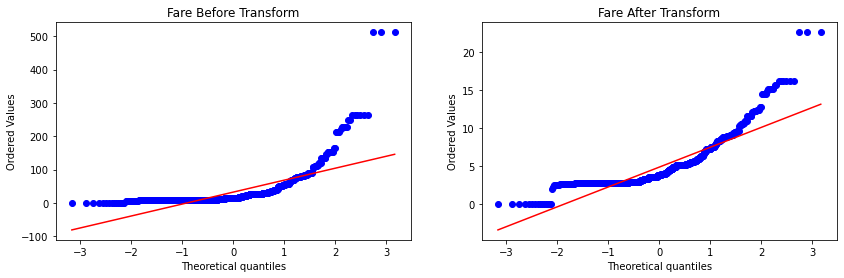

In [25]:
# sqrt transformation
apply_transform(lambda x : x**(1/2))